# MCA with Matplotlib

In [1]:
# Import dataset
import pandas as pd
A= pd.read_excel("./scientisttools/data/races_canines_acm.xlsx",header=0,index_col=0)

In [2]:
from scientisttools.decomposition import MCA
my_mca = MCA(n_components=None,
             row_labels=A.index[:27],
             var_labels=A.columns[:6],
             mod_labels=None,
             matrix_type="completed",
             benzecri=True,
             greenacre=True,
             row_sup_labels=A.index[27:],
             quali_sup_labels=["Fonction"],
             quanti_sup_labels=["Cote"],
             parallelize=False).fit(A)

## Individuals Factor Map - MCA

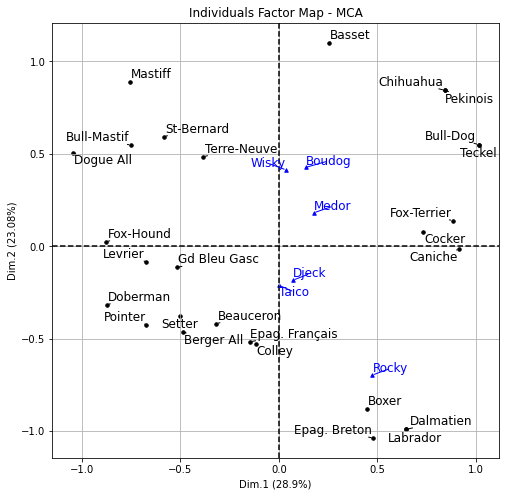

In [3]:
from scientisttools.pyplot import plot_mca_ind
import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_ind(my_mca,repel=True)
plt.show()

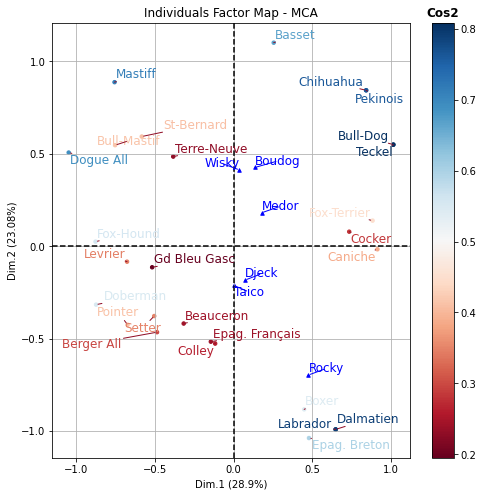

In [4]:
# Color with cos2
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_ind(my_mca,color="cos2",repel=True)
plt.show()

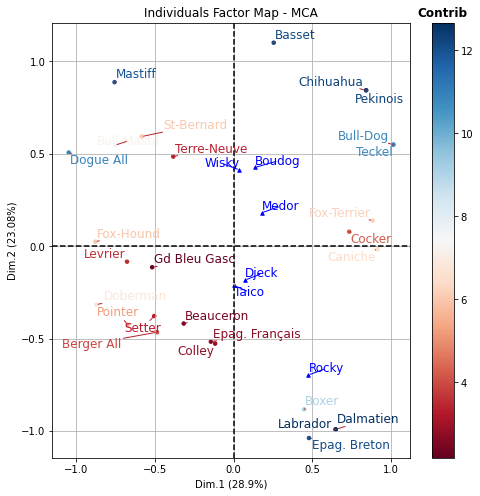

In [5]:
# Color with contribution
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_ind(my_mca,color="contrib",repel=True)
plt.show()

### Coloriage en fonction d'une donnée quantitative simulée

In [6]:
# Color with numpy array
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=27)
color_numpy

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ,
       -0.67888615, -0.09470897,  1.49138963, -0.638902  , -0.44398196,
       -0.43435128,  2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ,
        0.73736858,  1.49073203, -0.93583387,  1.17582904, -1.25388067,
       -0.6377515 ,  0.9071052 ])

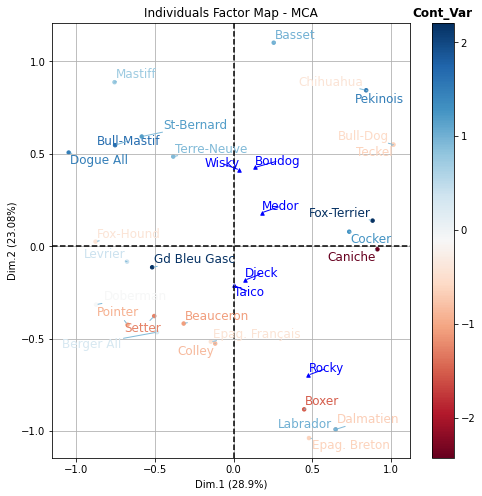

In [7]:
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_ind(my_mca,color=color_numpy,repel=True,random_state=123)
plt.show()

#### Coloriage en fonction des clusters d'appartenance

In [8]:
# Color using KMeans class
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(my_mca.row_coord_)
kmeans.labels_

array([2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 2])

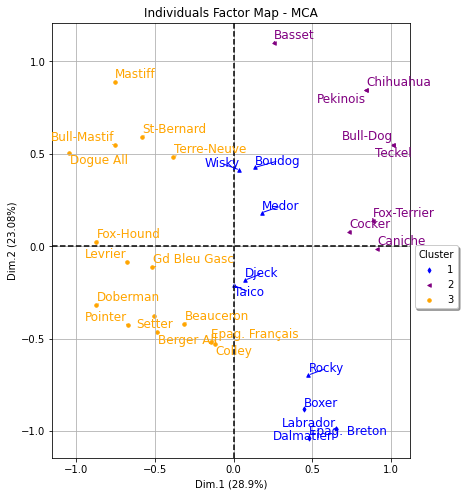

In [9]:
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_ind(my_mca,color=kmeans,repel=True,random_state=123)
plt.show()

### Habillage

#### Habillage en fonction d'une variable catégorielle active

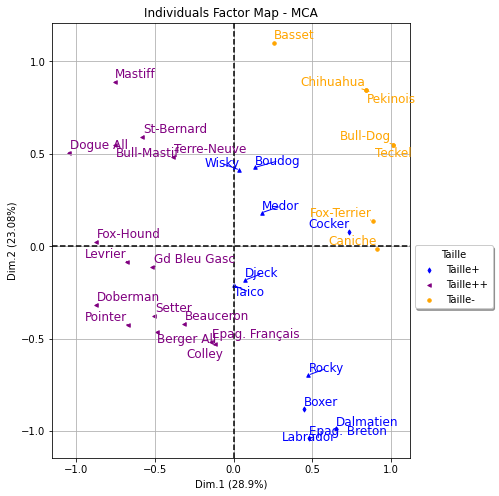

In [10]:
# Color using active categories variables
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_ind(my_mca,habillage="Taille",repel=True,random_state=123)
plt.show()

#### Habillage en fonction d'une variable catégorielle supplémentaire

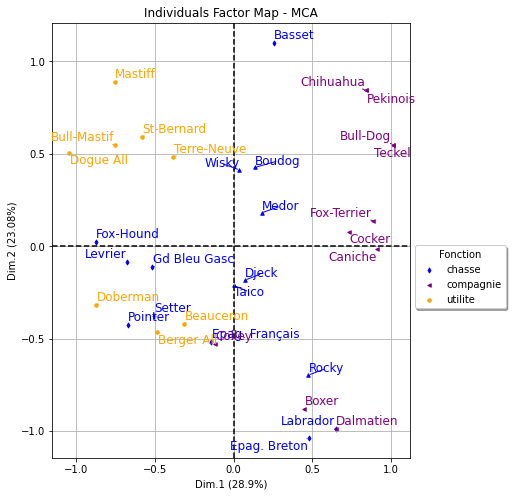

In [11]:
# Color using supplementary categories variables
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_ind(my_mca,habillage="Fonction",repel=True,random_state=123)
plt.show()

#### Habillage en fonction d'une variable quantitative supplémentaire

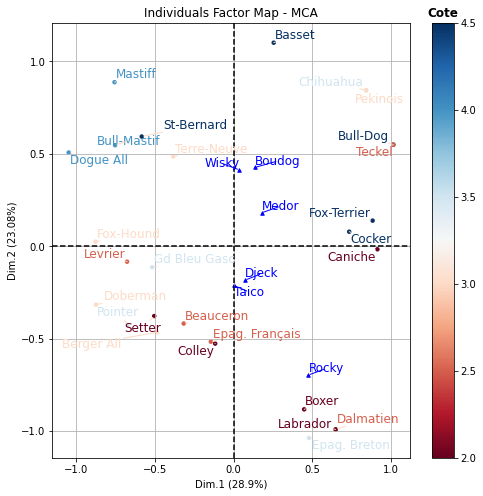

In [12]:
# color using supplementary continous variables
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_ind(my_mca,color="Cote",repel=True,random_state=123)
plt.show()

## Variables/categories Factor Map - MCA

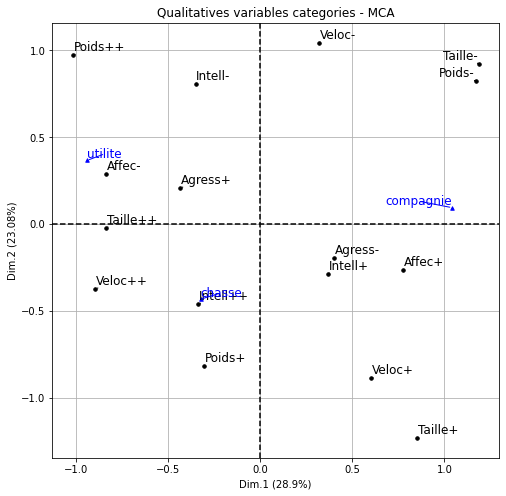

In [13]:
from scientisttools.pyplot import plot_mca_mod
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_mod(my_mca,repel=True)
plt.show()

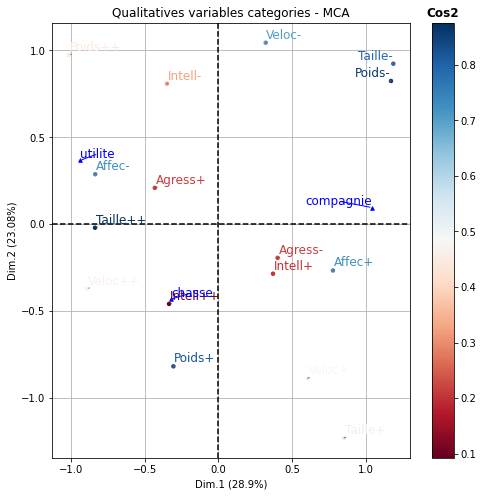

In [14]:
# Color using cos2
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_mod(my_mca,color="cos2",repel=True)
plt.show()

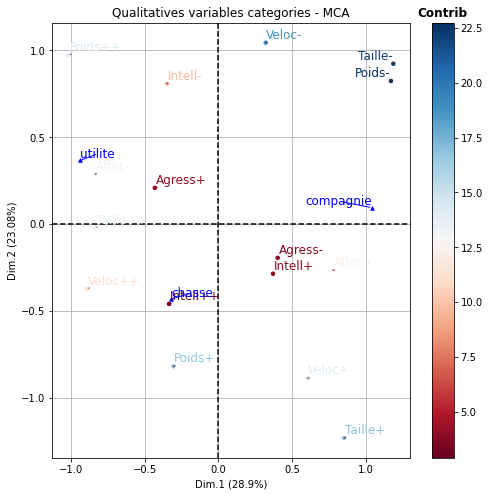

In [15]:
# Color using contrib
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_mod(my_mca,color="contrib",repel=True)
plt.show()

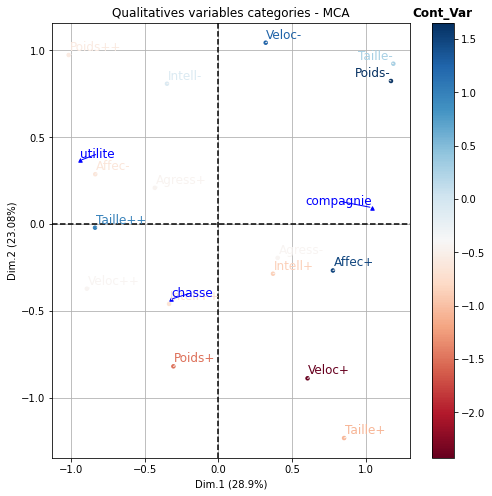

In [16]:
# Color using numpy array
np.random.seed(123)
color_numpy = np.random.normal(size=len(my_mca.mod_labels_))
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_mod(my_mca,color=color_numpy,repel=True)
plt.show()

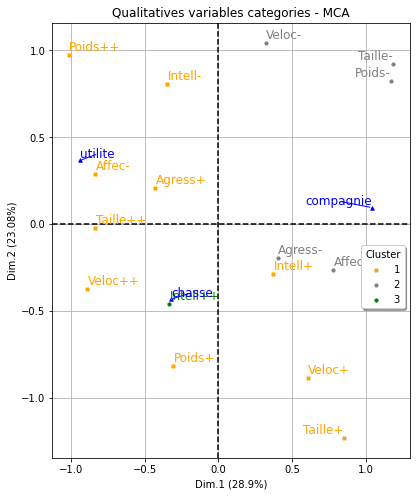

In [17]:
# Color using kmeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(my_mca.mod_coord_)
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_mod(my_mca,color=kmeans,repel=True)
plt.show()

## Variables

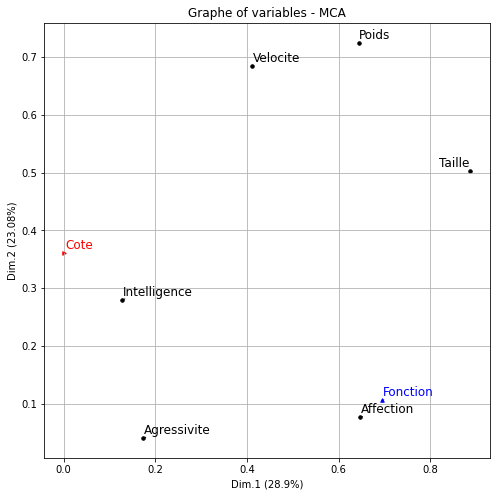

In [18]:
from scientisttools.pyplot import plot_mca_var
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_var(my_mca,repel=True)
plt.show()

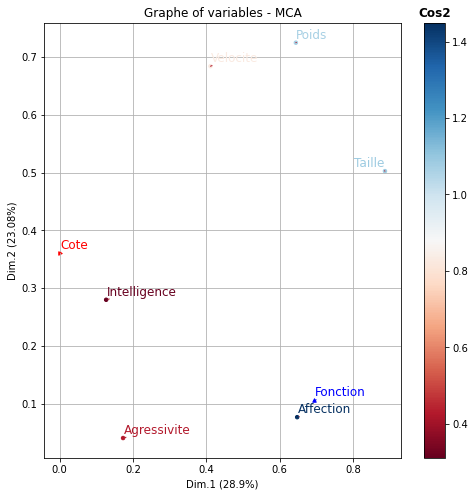

In [19]:
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_var(my_mca,color="cos2",repel=True)
plt.show()

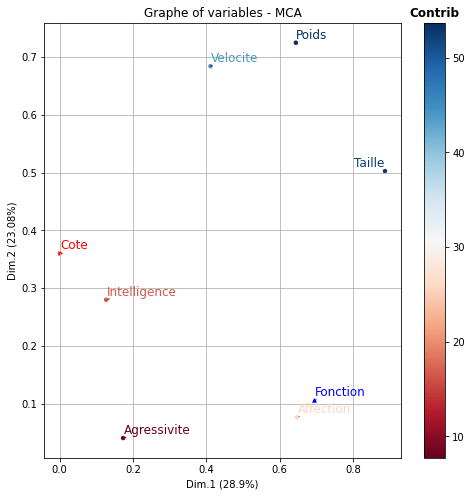

In [20]:
fig, axe = plt.subplots(figsize=(8,8))
plot_mca_var(my_mca,color="contrib",repel=True)
plt.show()

## Plot MCA

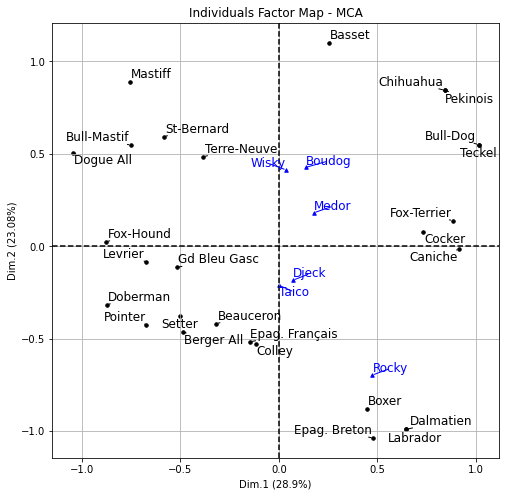

In [21]:
from scientisttools.pyplot import plotMCA
fig, axe = plt.subplots(figsize=(8,8))
plotMCA(my_mca,choice="ind",repel=True)
plt.show()

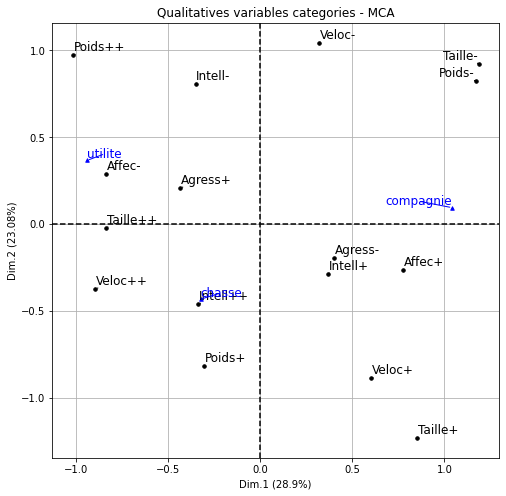

In [22]:
fig, axe = plt.subplots(figsize=(8,8))
plotMCA(my_mca,choice="mod",repel=True)
plt.show()

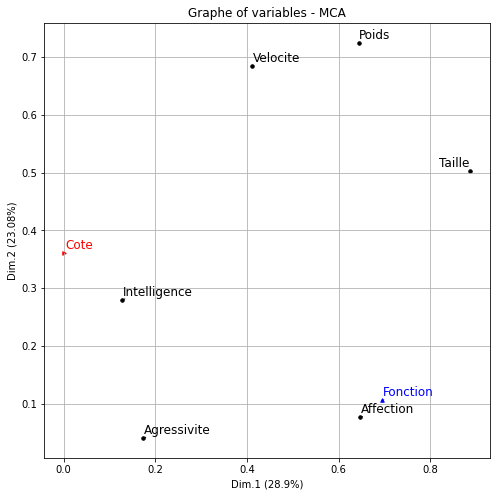

In [23]:
fig, axe = plt.subplots(figsize=(8,8))
plotMCA(my_mca,choice="var",repel=True)
plt.show()

#### Supplementary continuous variables

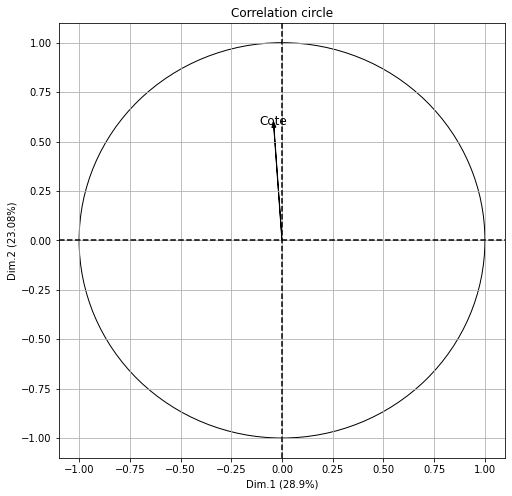

In [24]:
from scientisttools.pyplot import plot_correlation_circle
fig, axe = plt.subplots(figsize=(8,8))
plot_correlation_circle(my_mca,ax=axe)
plt.show()

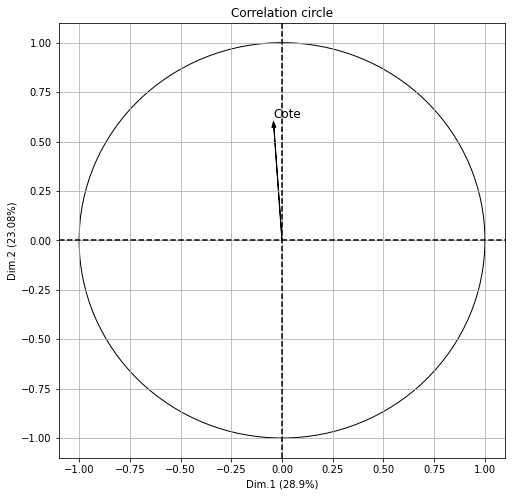

In [25]:
fig, axe = plt.subplots(figsize=(8,8))
plotMCA(my_mca,choice="quanti_sup",repel=True)
plt.show()

#### Contributions

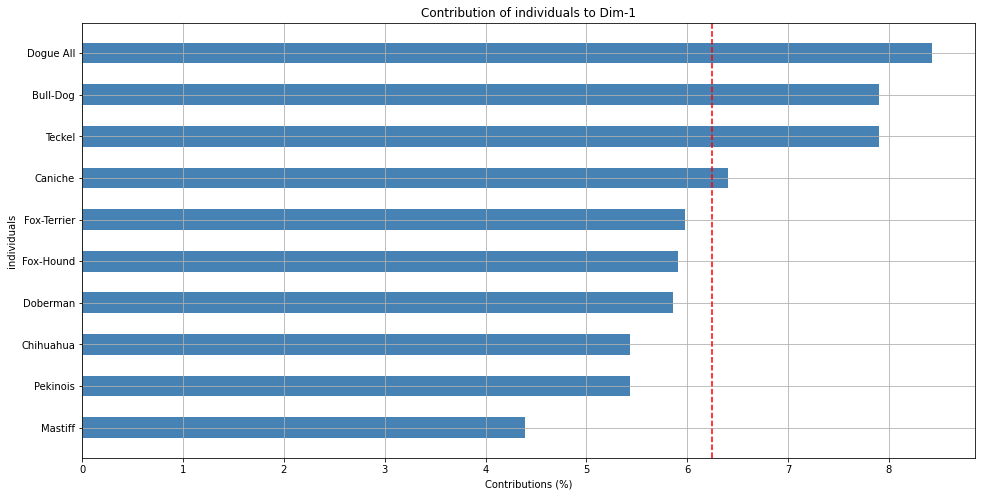

In [26]:
from scientisttools.pyplot import plot_contrib
fig, axe = plt.subplots(figsize=(16,8))
plot_contrib(my_mca,choice="ind",ax=axe)
plt.show()

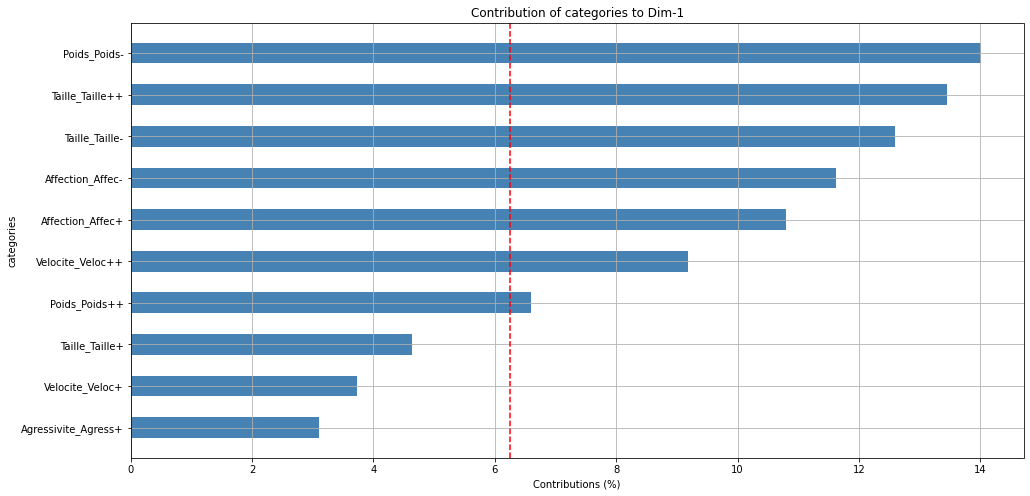

In [27]:
fig, axe = plt.subplots(figsize=(16,8))
plot_contrib(my_mca,choice="mod",ax=axe)
plt.show()

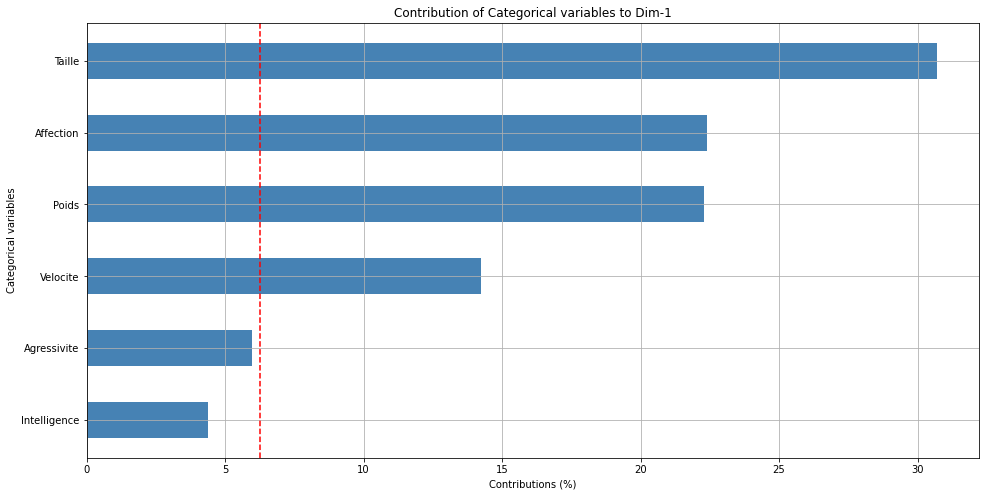

In [28]:
fig, axe = plt.subplots(figsize=(16,8))
plot_contrib(my_mca,choice="var",ax=axe)
plt.show()

#### Cos2

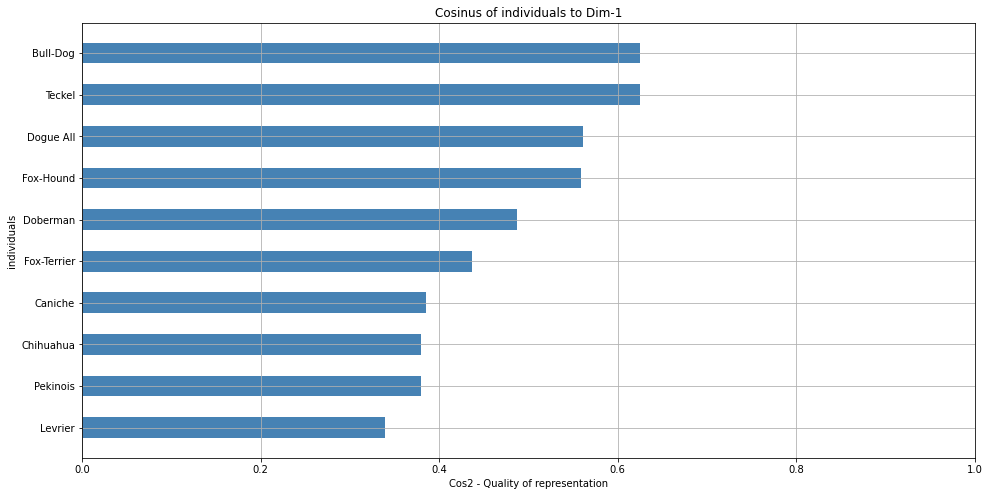

In [29]:
from scientisttools.pyplot import plot_cosines
fig, axe = plt.subplots(figsize=(16,8))
plot_cosines(my_mca,choice="ind",ax=axe)
plt.show()

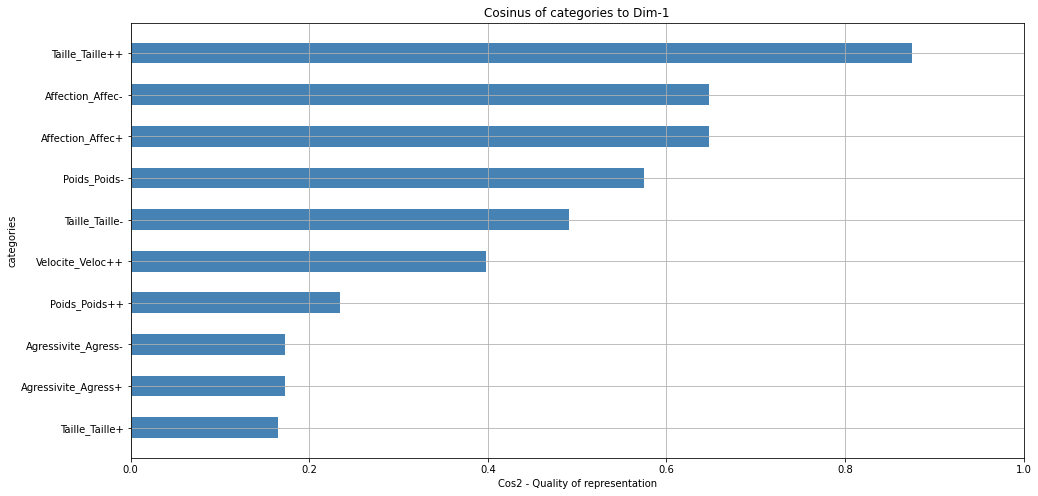

In [30]:
fig, axe = plt.subplots(figsize=(16,8))
plot_cosines(my_mca,choice="mod",ax=axe)
plt.show()

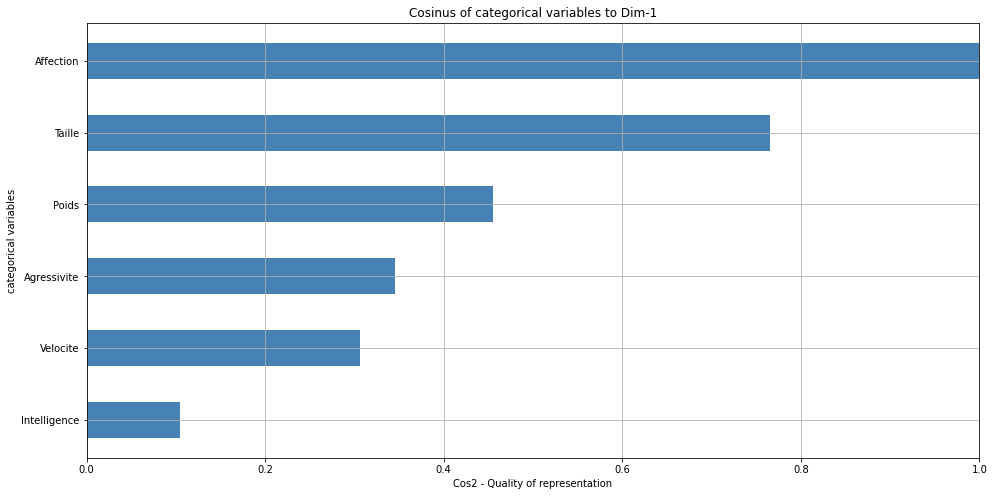

In [31]:
fig, axe = plt.subplots(figsize=(16,8))
plot_cosines(my_mca,choice="var",ax=axe)
plt.show()

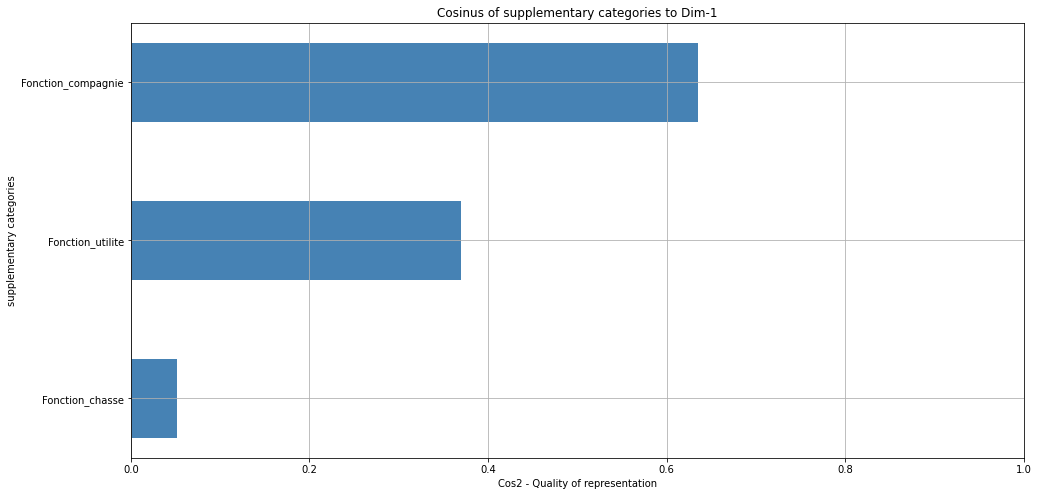

In [32]:
fig, axe = plt.subplots(figsize=(16,8))
plot_cosines(my_mca,choice="quali_sup",ax=axe)
plt.show()